<a href="https://colab.research.google.com/github/amr552/Deep-Learning/blob/main/Recognition%20of%20plant%20disease%20with%20pre-trained%20cnn%20models25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to premium GPUs. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to enable Premium accelerator. Subject to availability, selecting a premium GPU may grant you access to a V100 or A100 Nvidia GPU.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(f' GPU working {gpu_info}')

 GPU working Fri Apr 26 14:06:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+------------

In [2]:

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import (
    VGG16,
    VGG19,
    ResNet50,
    ResNet152,
    DenseNet121,
    DenseNet201,
    InceptionV3,
    MobileNet,
    Xception,
    EfficientNetB0,
    EfficientNetB1

)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import save_model


In [4]:
# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
ModelNo=0

In [5]:
# Set the paths to your training and test datasets

train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"
val_dir = "/content/drive/MyDrive/datasets/plant_disease/Validation/Validation"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets with data augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


27018416/27018416 [==============================] - 2s 0us/step


Epoch 1/25
41/41 [==============================] - 921s 22s/step - loss: 2.0263 - accuracy: 0.3349 - val_loss: 1.0982 - val_accuracy: 0.3125
Epoch 2/25
41/41 [==============================] - 102s 2s/step - loss: 1.1125 - accuracy: 0.3442 - val_loss: 1.1081 - val_accuracy: 0.2812
Epoch 3/25
41/41 [==============================] - 94s 2s/step - loss: 1.1010 - accuracy: 0.3209 - val_loss: 1.0982 - val_accuracy: 0.4062
Epoch 4/25
41/41 [==============================] - 95s 2s/step - loss: 1.1007 - accuracy: 0.3496 - val_loss: 1.0995 - val_accuracy: 0.3125
Epoch 5/25
41/41 [==============================] - 92s 2s/step - loss: 1.0988 - accuracy: 0.3225 - val_loss: 1.0983 - val_accuracy: 0.3750
Epoch 6/25
41/41 [==============================] - 95s 2s/step - loss: 1.0987 - accuracy: 0.3310 - val_loss: 1.0975 - val_accuracy: 0.4062
Epoch 7/25
41/41 [==============================] - 111s 3s/step - loss: 1.0984 - accuracy: 0.3496 - val_loss: 1.1042 - val_accuracy: 0.2188
Epoch 8/25
41/41

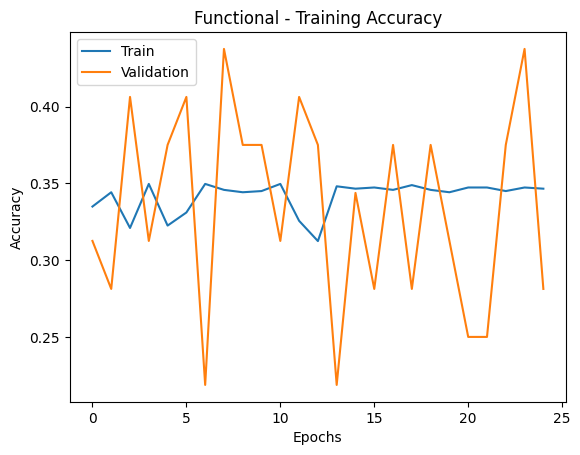

5/5 [==============================] - 117s 29s/step - loss: 1.0989 - accuracy: 0.3333
Test Accuracy: 0.3333
5/5 [==============================] - 9s 2s/step


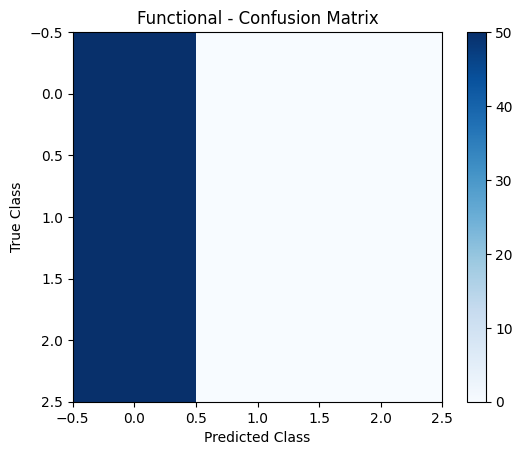

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving y

              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150



saved_model1.h5
Epoch 1/25
41/41 [==============================] - 101s 2s/step - loss: 25.8185 - accuracy: 0.3194 - val_loss: 1.0929 - val_accuracy: 0.3750
Epoch 2/25
41/41 [==============================] - 101s 2s/step - loss: 1.1070 - accuracy: 0.3310 - val_loss: 1.0960 - val_accuracy: 0.4688
Epoch 3/25
41/41 [==============================] - 101s 2s/step - loss: 1.0991 - accuracy: 0.3202 - val_loss: 1.0992 - val_accuracy: 0.2188
Epoch 4/25
41/41 [==============================] - 99s 2s/step - loss: 1.0988 - accuracy: 0.3194 - val_loss: 1.0994 - val_accuracy: 0.2812
Epoch 5/25
41/41 [==============================] - 98s 2s/step - loss: 1.0985 - accuracy: 0.3473 - val_loss: 1.1000 - val_accuracy: 0.2812
Epoch 6/25
41/41 [==============================] - 96s 2s/step - loss: 1.1030 - accuracy: 0.3209 - val_loss: 1.0955 - val_accuracy: 0.3750
Epoch 7/25
41/41 [==============================] - 102s 2s/step - loss: 1.0981 - accuracy: 0.3465 - val_loss: 1.0980 - val_accuracy: 0.3750

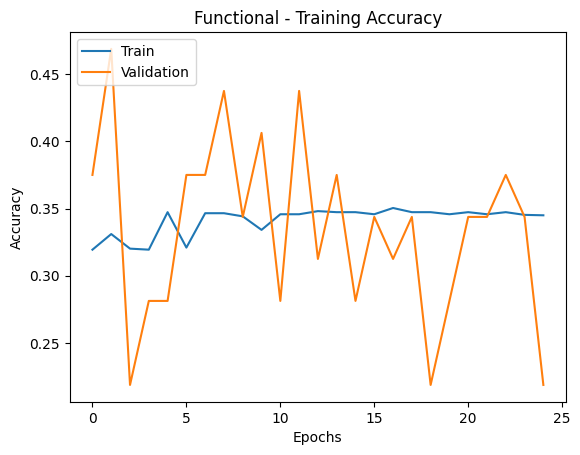

5/5 [==============================] - 12s 2s/step - loss: 1.0990 - accuracy: 0.3333
Test Accuracy: 0.3333
5/5 [==============================] - 11s 2s/step


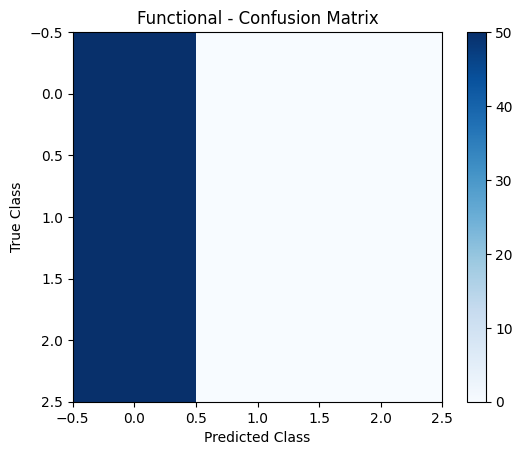

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving y

              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

saved_model2.h5


Epoch 1/25
41/41 [==============================] - 129s 2s/step - loss: 0.4822 - accuracy: 0.8775 - val_loss: 683601.5000 - val_accuracy: 0.4062
Epoch 2/25
41/41 [==============================] - 97s 2s/step - loss: 0.1667 - accuracy: 0.9527 - val_loss: 286.5867 - val_accuracy: 0.3438
Epoch 3/25
41/41 [==============================] - 105s 3s/step - loss: 0.1138 - accuracy: 0.9574 - val_loss: 1.1316 - val_accuracy: 0.3125
Epoch 4/25
41/41 [==============================] - 95s 2s/step - loss: 0.0822 - accuracy: 0.9791 - val_loss: 1.1125 - val_accuracy: 0.3438
Epoch 5/25
41/41 [==============================] - 104s 3s/step - loss: 0.0680 - accuracy: 0.9837 - val_loss: 1.1183 - val_accuracy: 0.3125
Epoch 6/25
41/41 [==============================] - 102s 2s/step - loss: 0.0786 - accuracy: 0.9798 - val_loss: 1.0823 - val_accuracy: 0.4688
Epoch 7/25
41/41 [==============================] - 104s 3s/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 1.1048 - val_accuracy: 0.1875
Epoch 8/

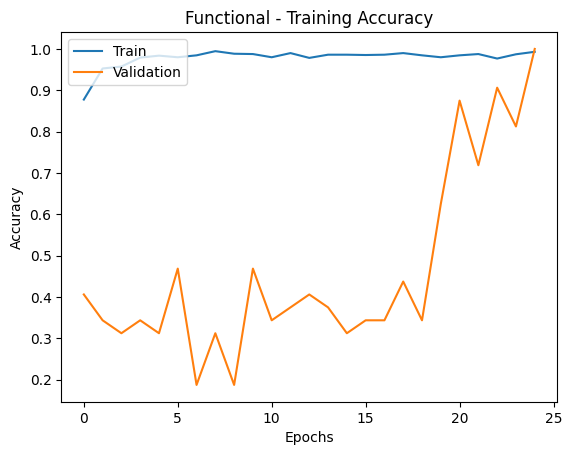

5/5 [==============================] - 11s 2s/step - loss: 0.2033 - accuracy: 0.9600
Test Accuracy: 0.9600
5/5 [==============================] - 10s 2s/step


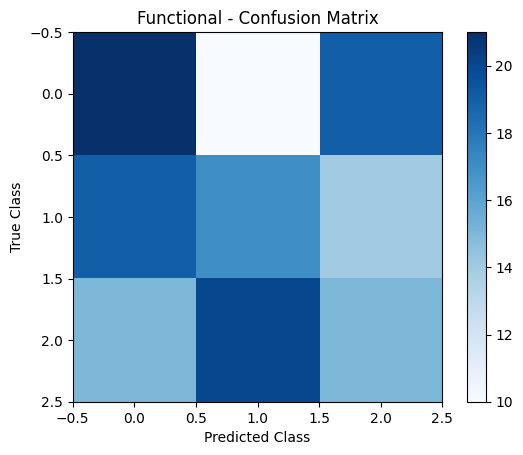

              precision    recall  f1-score   support

     Healthy       0.38      0.42      0.40        50
     Powdery       0.36      0.34      0.35        50
        Rust       0.31      0.30      0.31        50

    accuracy                           0.35       150
   macro avg       0.35      0.35      0.35       150
weighted avg       0.35      0.35      0.35       150



<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename


saved_model3.h5


Epoch 1/25
41/41 [==============================] - 190s 2s/step - loss: 0.5494 - accuracy: 0.8775 - val_loss: 532407808.0000 - val_accuracy: 0.3438
Epoch 2/25
41/41 [==============================] - 103s 2s/step - loss: 0.2055 - accuracy: 0.9442 - val_loss: 4594.0659 - val_accuracy: 0.2188
Epoch 3/25
41/41 [==============================] - 97s 2s/step - loss: 0.1008 - accuracy: 0.9705 - val_loss: 6.3249 - val_accuracy: 0.3750
Epoch 4/25
41/41 [==============================] - 99s 2s/step - loss: 0.1831 - accuracy: 0.9426 - val_loss: 38.5553 - val_accuracy: 0.3438
Epoch 5/25
41/41 [==============================] - 101s 3s/step - loss: 0.1126 - accuracy: 0.9705 - val_loss: 5.4937 - val_accuracy: 0.2812
Epoch 6/25
41/41 [==============================] - 106s 3s/step - loss: 0.0579 - accuracy: 0.9845 - val_loss: 4.3078 - val_accuracy: 0.2812
Epoch 7/25
41/41 [==============================] - 98s 2s/step - loss: 0.0878 - accuracy: 0.9806 - val_loss: 1.2557 - val_accuracy: 0.2500
Epoc

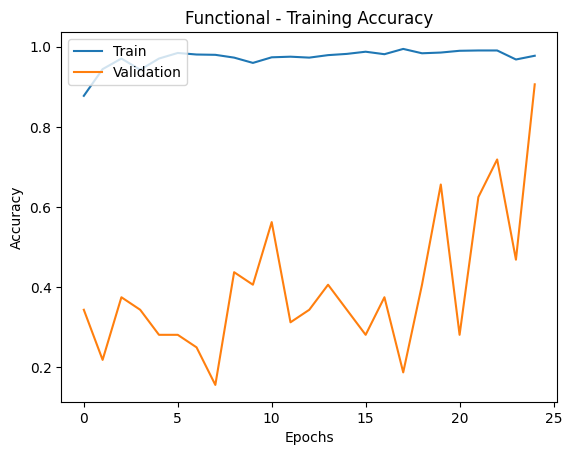

5/5 [==============================] - 11s 2s/step - loss: 0.2440 - accuracy: 0.9333
Test Accuracy: 0.9333
5/5 [==============================] - 14s 2s/step


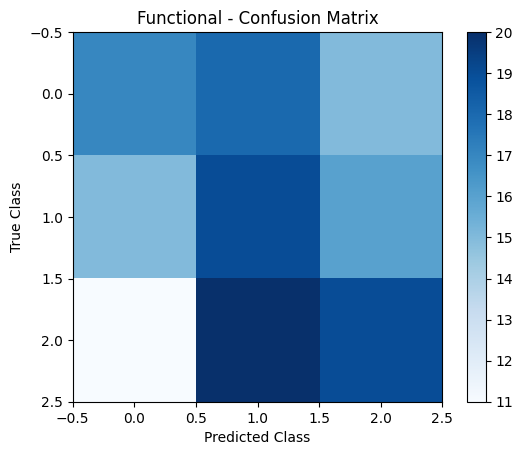

              precision    recall  f1-score   support

     Healthy       0.40      0.34      0.37        50
     Powdery       0.33      0.38      0.36        50
        Rust       0.38      0.38      0.38        50

    accuracy                           0.37       150
   macro avg       0.37      0.37      0.37       150
weighted avg       0.37      0.37      0.37       150



<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename


saved_model4.h5


Epoch 1/25
41/41 [==============================] - 166s 2s/step - loss: 0.2308 - accuracy: 0.9256 - val_loss: 44.4885 - val_accuracy: 0.4062
Epoch 2/25
41/41 [==============================] - 96s 2s/step - loss: 0.0950 - accuracy: 0.9729 - val_loss: 65.5013 - val_accuracy: 0.2812
Epoch 3/25
41/41 [==============================] - 93s 2s/step - loss: 0.0747 - accuracy: 0.9729 - val_loss: 0.6802 - val_accuracy: 0.8438
Epoch 4/25
41/41 [==============================] - 98s 2s/step - loss: 0.0586 - accuracy: 0.9829 - val_loss: 0.3929 - val_accuracy: 0.9062
Epoch 5/25
41/41 [==============================] - 94s 2s/step - loss: 0.0407 - accuracy: 0.9868 - val_loss: 0.0541 - val_accuracy: 0.9688
Epoch 6/25
41/41 [==============================] - 102s 2s/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.1303 - val_accuracy: 0.9688
Epoch 7/25
41/41 [==============================] - 105s 3s/step - loss: 0.1026 - accuracy: 0.9721 - val_loss: 1.0511 - val_accuracy: 0.6562
Epoch 8/25
41/4

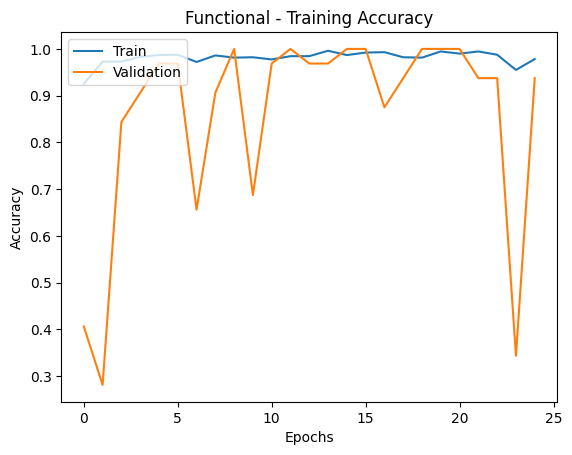

5/5 [==============================] - 14s 3s/step - loss: 0.3701 - accuracy: 0.9400
Test Accuracy: 0.9400
5/5 [==============================] - 11s 2s/step


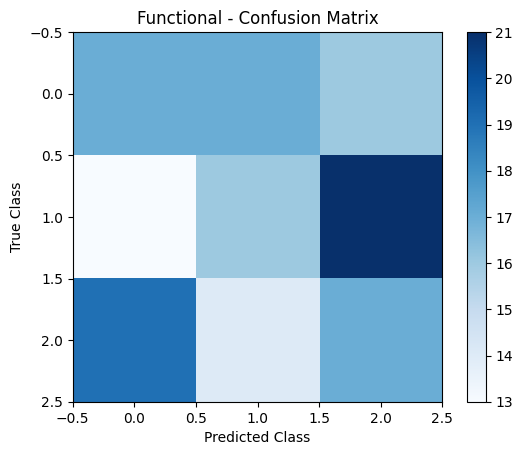

              precision    recall  f1-score   support

     Healthy       0.35      0.34      0.34        50
     Powdery       0.34      0.32      0.33        50
        Rust       0.31      0.34      0.33        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename


saved_model5.h5


Epoch 1/25
41/41 [==============================] - 203s 2s/step - loss: 0.2665 - accuracy: 0.9202 - val_loss: 231.9182 - val_accuracy: 0.2500
Epoch 2/25
41/41 [==============================] - 98s 2s/step - loss: 0.1166 - accuracy: 0.9612 - val_loss: 150.0655 - val_accuracy: 0.3750
Epoch 3/25
41/41 [==============================] - 97s 2s/step - loss: 0.1468 - accuracy: 0.9574 - val_loss: 13.7046 - val_accuracy: 0.3750
Epoch 4/25
41/41 [==============================] - 93s 2s/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 5/25
41/41 [==============================] - 93s 2s/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/25
41/41 [==============================] - 101s 2s/step - loss: 0.0852 - accuracy: 0.9752 - val_loss: 0.3724 - val_accuracy: 0.8750
Epoch 7/25
41/41 [==============================] - 103s 2s/step - loss: 0.0763 - accuracy: 0.9822 - val_loss: 0.8347 - val_accuracy: 0.8750
Epoch 8/25
4

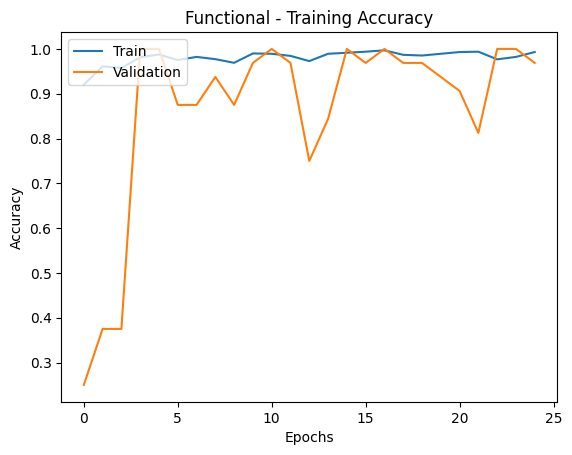

5/5 [==============================] - 13s 3s/step - loss: 0.6216 - accuracy: 0.9467
Test Accuracy: 0.9467
5/5 [==============================] - 13s 2s/step


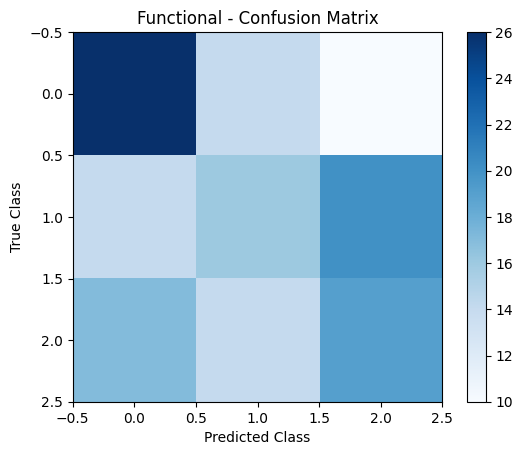

              precision    recall  f1-score   support

     Healthy       0.46      0.52      0.49        50
     Powdery       0.36      0.32      0.34        50
        Rust       0.39      0.38      0.38        50

    accuracy                           0.41       150
   macro avg       0.40      0.41      0.40       150
weighted avg       0.40      0.41      0.40       150



<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename


saved_model6.h5


Epoch 1/25
41/41 [==============================] - 143s 3s/step - loss: 0.2899 - accuracy: 0.9062 - val_loss: 166.9831 - val_accuracy: 0.2812
Epoch 2/25
41/41 [==============================] - 94s 2s/step - loss: 0.1469 - accuracy: 0.9589 - val_loss: 3.8467 - val_accuracy: 0.7188
Epoch 3/25
41/41 [==============================] - 96s 2s/step - loss: 0.1443 - accuracy: 0.9543 - val_loss: 6.2142 - val_accuracy: 0.5938
Epoch 4/25
41/41 [==============================] - 91s 2s/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 3.3359 - val_accuracy: 0.6875
Epoch 5/25
41/41 [==============================] - 104s 3s/step - loss: 0.0849 - accuracy: 0.9744 - val_loss: 0.4404 - val_accuracy: 0.9688
Epoch 6/25
41/41 [==============================] - 95s 2s/step - loss: 0.1093 - accuracy: 0.9698 - val_loss: 16.9477 - val_accuracy: 0.4688
Epoch 7/25
41/41 [==============================] - 94s 2s/step - loss: 0.1498 - accuracy: 0.9636 - val_loss: 9.8160 - val_accuracy: 0.3438
Epoch 8/25
41/4

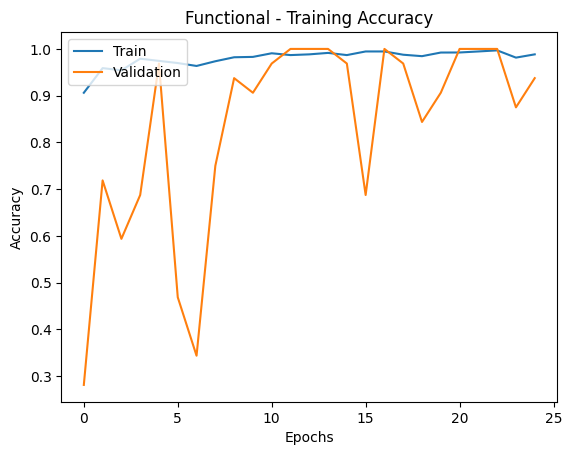

5/5 [==============================] - 12s 3s/step - loss: 0.1770 - accuracy: 0.9733
Test Accuracy: 0.9733
5/5 [==============================] - 11s 2s/step


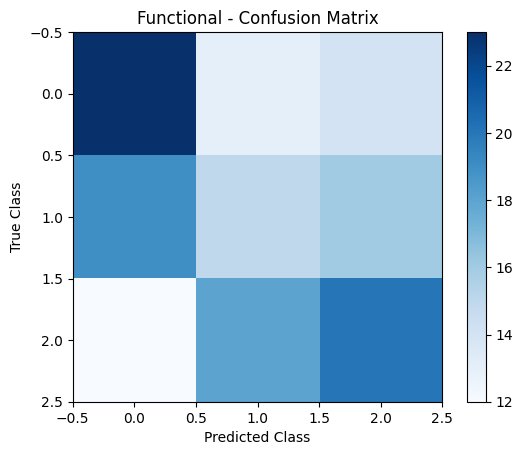

              precision    recall  f1-score   support

     Healthy       0.43      0.46      0.44        50
     Powdery       0.33      0.30      0.31        50
        Rust       0.40      0.40      0.40        50

    accuracy                           0.39       150
   macro avg       0.38      0.39      0.38       150
weighted avg       0.38      0.39      0.38       150



<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename


saved_model7.h5


Epoch 1/25
41/41 [==============================] - 112s 2s/step - loss: 0.3108 - accuracy: 0.9194 - val_loss: 0.5180 - val_accuracy: 0.9062
Epoch 2/25
41/41 [==============================] - 94s 2s/step - loss: 0.0976 - accuracy: 0.9767 - val_loss: 0.1292 - val_accuracy: 0.9688
Epoch 3/25
41/41 [==============================] - 97s 2s/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 1.0949 - val_accuracy: 0.8750
Epoch 4/25
41/41 [==============================] - 93s 2s/step - loss: 0.1234 - accuracy: 0.9698 - val_loss: 3.8490 - val_accuracy: 0.6875
Epoch 5/25
41/41 [==============================] - 96s 2s/step - loss: 0.0911 - accuracy: 0.9705 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/25
41/41 [==============================] - 96s 2s/step - loss: 0.0368 - accuracy: 0.9899 - val_loss: 0.6489 - val_accuracy: 0.9375
Epoch 7/25
41/41 [==============================] - 96s 2s/step - loss: 0.0461 - accuracy: 0.9822 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 8/25
41/41 [=

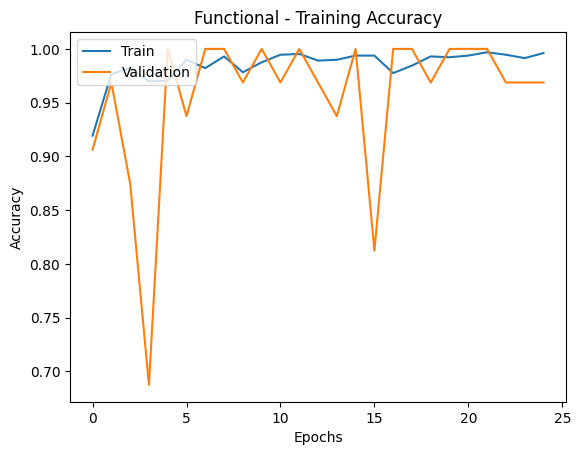

5/5 [==============================] - 10s 2s/step - loss: 0.5667 - accuracy: 0.9467
Test Accuracy: 0.9467
5/5 [==============================] - 11s 2s/step


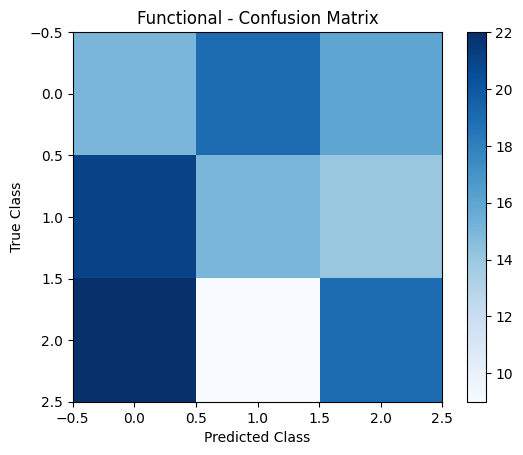

              precision    recall  f1-score   support

     Healthy       0.26      0.30      0.28        50
     Powdery       0.35      0.30      0.32        50
        Rust       0.39      0.38      0.38        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



<ipython-input-6-3a86cdef8946>:86: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename


saved_model8.h5


Epoch 1/25
41/41 [==============================] - 128s 2s/step - loss: 0.2112 - accuracy: 0.9248 - val_loss: 0.2208 - val_accuracy: 0.9688
Epoch 2/25
41/41 [==============================] - 103s 2s/step - loss: 0.1097 - accuracy: 0.9736 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/25
41/41 [==============================] - 104s 3s/step - loss: 0.0629 - accuracy: 0.9837 - val_loss: 0.2850 - val_accuracy: 0.9688
Epoch 4/25
41/41 [==============================] - 102s 2s/step - loss: 0.0560 - accuracy: 0.9868 - val_loss: 0.0431 - val_accuracy: 0.9688
Epoch 5/25
41/41 [==============================] - 100s 2s/step - loss: 0.0403 - accuracy: 0.9860 - val_loss: 0.2297 - val_accuracy: 0.9375
Epoch 6/25
41/41 [==============================] - 97s 2s/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.4919 - val_accuracy: 0.7812
Epoch 7/25
41/41 [==============================] - 113s 3s/step - loss: 0.0858 - accuracy: 0.9798 - val_loss: 0.7859 - val_accuracy: 0.9062
Epoch 8/25

In [ ]:
from tensorflow.keras.models import save_model

models = [
    VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    VGG19(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    ResNet50(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    ResNet152(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    DenseNet121(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    DenseNet201(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    InceptionV3(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    MobileNet(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    Xception(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    EfficientNetB0(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
    EfficientNetB1(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3)),
]

for model in models:
    base_model = model
    model_name = base_model.__class__.__name__

    model = tf.keras.models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(3, activation="softmax"))
    ModelNo+=1

    # Early stopping to prevent overfitting
    # early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

    # Model checkpoint to save the best model based on validation loss
    #model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    # model_checkpoint = ModelCheckpoint(f'best_model{ModelNo}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
    # print(f'best_model{ModelNo}.h5')

    model.compile(
        loss="categorical_crossentropy",
        optimizer=tf.keras.optimizers.Adam(lr=0.0001),
        metrics=["accuracy"],
    )

    # Train the model with data augmentation
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // batch_size,
        epochs=25,
        validation_data=val_generator,
        validation_steps=val_generator.n // batch_size,
        #callbacks=[early_stopping, model_checkpoint]
    )

    # Generate training accuracy graph
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(f"{model_name} - Training Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"], loc="upper left")
    plt.show()

    #test step
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Generate confusion matrix
    test_labels = test_generator.classes
    predictions = model.predict(test_generator)
    predicted_labels = np.argmax(predictions, axis=1)

    cm = confusion_matrix(test_labels, predicted_labels)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()


    # Calculate evaluation metrics
    report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
    print(report)

    save_model(model, f'saved_model{ModelNo}.h5')  # Replace 'saved_model.h5' with your desired filename
    print(f'saved_model{ModelNo}.h5')

In [ ]:
num_classes=3
# GoogLeNet model architecture
def create_googlenet(num_classes):
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_tensor=inputs)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
    return model

googlenet_model = create_googlenet(num_classes)

# Compile the model
googlenet_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = googlenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)
# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{model_name} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
# Evaluate the models on the test set
googlenet_scores = googlenet_model.evaluate(test_generator)

print("GoogLeNet Test Accuracy:", googlenet_scores[1])
# Generate confusion matrix
test_labels = test_generator.classes
predictions = googlenet_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{googlenet_model} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Calculate evaluation metrics
report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print(report)
save_model(model, 'saved_modelgooglenet.h5')
print('saved_modelgooglenet.h5')

In [ ]:
num_classes=3
# AlexNet model architecture
def create_alexnet(num_classes):
    inputs = tf.keras.Input(shape=(img_width, img_height, 3))
    x = tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(256, (5, 5), padding="same", activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(384, (3, 3), padding="same", activation='relu')(x)
    x = tf.keras.layers.Conv2D(384, (3, 3), padding="same", activation='relu')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    return model



# Create the AlexNet model
alexnet_model = create_alexnet(num_classes)

# Compile the model
alexnet_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = alexnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)
# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{model_name} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

alexnet_scores = alexnet_model.evaluate(test_generator)
print("AlexNet Test Accuracy:", alexnet_scores[1])
# Generate confusion matrix
test_labels = test_generator.classes
predictions = alexnet_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{alexnet_model} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Calculate evaluation metrics
report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print(report)
save_model(model, 'saved_modelalexnet.h5')
print('saved_modelalexnet.h5')